In [3]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Dimensiones de la imagen a crear
ancho = 350
alto = 350

In [5]:
#Crea una imagen de un único plano
# Al ser un único plano, se interpreta como nivel de gris (0 negro, 255 blanco)
gris_img = np.zeros((alto,ancho,1), dtype = np.uint8)
#Muestra dimensiones de la imagen creada
print(gris_img.shape)

(350, 350, 1)


Tarea 1: Crear una imagen con la textura de tablero de ajedrez:

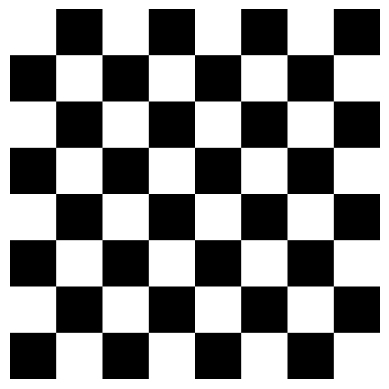

In [10]:
#Dimensiones del tablero de ajedrez
ancho = 400
alto = 400

gris_img = np.zeros((alto,ancho,1), dtype = np.uint8)
#Modifica un par de zonas rectangulares de la imagen

celda =50
for fila in range(0, alto, celda):
    for columna in range(0, ancho, celda):
        if (fila // celda + columna // celda) % 2 == 0:
            gris_img[fila:fila+celda, columna:columna+celda] = 255
        else:
            gris_img[fila:fila+celda, columna:columna+celda] = 0
#Muestra la imagen con matplotlib
#Al ser un plano, recordar especificar que el mapa de color usado es de grises
plt.imshow(gris_img, cmap='gray') #Te animo a probar a eliminar la especificación del mapa de color
plt.axis('off')
plt.show()

TAREA 2: Crear una imagen estilo Mondrian

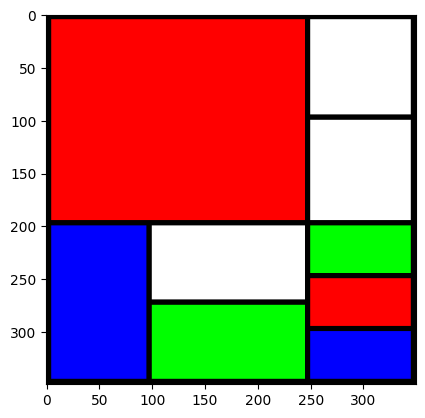

In [11]:
color_img = np.zeros((350, 350, 3), dtype=np.uint8)

# Rectángulos laterales blancos
color_img[5:95, 250:345] = 255
color_img[100:195, 250:345] = 255

# Rectángulo blanco en la parte inferior central
color_img[200:270, 100:245] = color_img[275:345, 100:245, 1] = 255

# Cuadrado amarillo en la esquina inferior derecha
color_img[200:245, 250:345, 1] = color_img[250:295, 250:345, 0] = color_img[300:345, 250:345, 2] = 255

# Cuadrado rojo en la parte superior central
color_img[5:195, 5:245, 0] = 255

# Cuadrado azul en la parte inferior izquierda
color_img[200:345, 5:95, 2] = 255

# Muestra la imagen
plt.imshow(color_img)
#plt.axis('off')
plt.show()

TAREA 3: Hacer uso de las funciones de dibujo de OpenCV

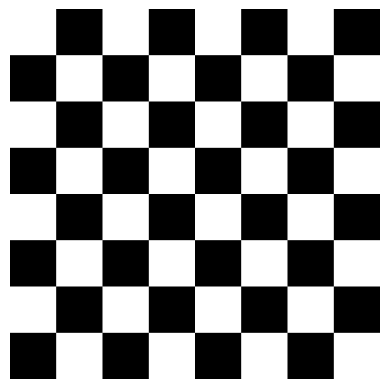

In [12]:
#Dimensiones del tablero de ajedrez
ancho = 400
alto = 400

#Crea una imagen con tres planos
tablero = np.zeros((alto,ancho,3), dtype = np.uint8)

# Tamaño de cada celda
celda = 50

# Dibujar las celdas con OpenCV
for fila in range(0, alto, celda):
    for columna in range(0, ancho, celda):
        # Alternar entre blanco y negro
        if (fila // celda + columna // celda) % 2 == 0:
            color = (255, 255, 255)  # Blanco     
        else:
            color = (0, 0, 0)        # Negro
        
        # Definir esquinas de la celda
        top_left = (columna, fila)
        bottom_right = (columna + celda, fila + celda)
        
        # Dibujar el rectángulo (celda)
        cv2.rectangle(tablero, top_left, bottom_right, color, -1)

# Mostrar la imagen con matplotlib
plt.imshow(cv2.cvtColor(tablero, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


TAREA 4: Modificar un plano de la imagen

TAREA 5: Destacar tanto el píxel con el color más claro como con el color más oscuro de una imagen

TAREA 6: Hacer una propuesta pop art con la entrada de la cámara web o vídeo